<!DOCTYPE html>
<html class="_9dls" dir="ltr" lang="en">
 <head>
  <link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192"/>
  <meta content="noarchive, noimageindex" name="robots"/>
  <meta charset="utf-8"/>
  <meta content="default" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/>
  <meta content="#ffffff" name="theme-color"/>
  <link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/>
  <link href="https://static.cdninstagram.com/rsrc.php/v3/yx/r/H1l_HHqi4p6.png" rel="apple-touch-icon" 
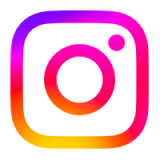
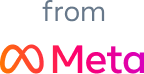

In [8]:
import requests
from bs4 import BeautifulSoup

# Replace with the username you want to scrape
username = 'instagram'

# Define the URL to scrape
url = f'https://www.instagram.com/artistpng/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Print out the entire HTML content of the page
    print(soup.prettify())

    # Find the elements with the public data you want to scrape
    # For example, to get the follower count, you can use:
    followers_elem = soup.find('span', {'class': 'g47SY'})
    
    # Check if the element was found before accessing its text attribute
    if followers_elem:
        followers = followers_elem.text
        print(f"Followers: {followers}")
    else:
        print("Could not find the follower count")
else:
    # If the request was unsuccessful, print an error message
    print(f"Error: {response.status_code}")


In [13]:
import requests
from bs4 import BeautifulSoup

# Replace with the username you want to scrape
username = 'example_username'

# Define the URL to scrape
url = f'https://www.instagram.com/artistpng/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the og:description meta tag
    meta_tag = soup.find('meta', {'property': 'og:description'})

    # Check if the meta tag was found before accessing its content attribute
    if meta_tag:
        content = meta_tag.get('content')

        # Print the content to debug the issue
        print(f"Content: {content}")

        # Extract the follower count, following count, and number of posts from the content
        parts = content.split(' - ')

        # Print the parts list to debug the issue
        print(f"Parts: {parts}")

        followers = parts[0].split()[0]
        following = parts[1].split()[0]
        posts = parts[2].split()[0]

        # Print out the public data
        print(f"Followers: {followers}")
        print(f"Following: {following}")
        print(f"Number of posts: {posts}")
    else:
        print("Could not find the public data")
else:
    # If the request was unsuccessful, print an error message
    print(f"Error: {response.status_code}")


Content: 101 Followers, 2,863 Following, 10 Posts - See Instagram photos and videos from Creative Soul (@artistpng)
Parts: ['101 Followers, 2,863 Following, 10 Posts', 'See Instagram photos and videos from Creative Soul (@artistpng)']


IndexError: list index out of range

<meta content="2,662 Followers, 925 Following, 54 Posts - See Instagram photos and videos from Geo Joseph (@geojoseph19)" name="description"/>
<!DOCTYPE html>
<html class="_9dls" dir="ltr" lang="en">
 <head>
  <link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" href="https://static.cdninstagram.com/rsrc.php/v3/yb/r/lswP1OF1o6P.png" rel="icon" sizes="192x192"/>
  <meta content="noarchive, noimageindex" name="robots"/>
  <meta charset="utf-8"/>
  <meta content="default" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/>
  <meta content="#ffffff" name="theme-color"/>
  <link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" r
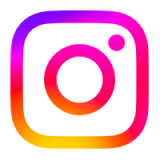
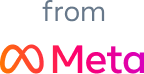

In [21]:
import requests
from bs4 import BeautifulSoup

# Replace with the username you want to scrape
username = 'example_username'

# Define the URL to scrape
url = f'https://www.instagram.com/geojoseph19/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the og:description meta tag
    meta_tag = soup.find('meta', {'name': 'description'})

    print(meta_tag)






"""
    # Check if the meta tag was found before accessing its content attribute
    if meta_tag:
        content = meta_tag.get('content')

        # Extract the follower count, following count, and number of posts from the content
        parts = content.split(' - ')

        # Check if the parts list has at least three elements before trying to access the third element
        if len(parts) >= 3:
            followers = parts[0].split()[0]
            following = parts[1].split()[0]
            posts = parts[2].split()[0]

            # Print out the public data
            print(f"Followers: {followers}")
            print(f"Following: {following}")
            print(f"Number of posts: {posts}")
        else:
            print("Could not find the public data")
    else:
        print("Could not find the public data")
else:
    # If the request was unsuccessful, print an error message
    print(f"Error: {response.status_code}")
    
"""
    
print(soup.prettify())
